In [2]:
# Importer les bibiotheques necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import joblib


In [2]:
# Read datas
# X: features, y: labels
features = pd.read_csv("../JeuDeDonnees/alt_acsincome_ca_features_85(1).csv")
labels = pd.read_csv("../JeuDeDonnees/alt_acsincome_ca_labels_85.csv")  

In [8]:
print(features.head())
print(labels.head())

X_train, X_test, y_train, y_test = train_test_split(
    features,           # X_train - X_test Características (features)
    labels.values.ravel(),             # y_train - y_test  (labels)
    test_size=0.2,      # Size test set (20%)
    random_state=42,    # Para reproducibilidad
)

   AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
0  41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
1  77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
2  38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
3  30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
4  36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0
   PINCP
0   True
1   True
2  False
3   True
4  False


In [9]:
# Task1:Calcul des taux de revenus supérieurs à 50 000$
# le taux d’individus ayant un revenu supérieur à 50 000 dollars

ratio_superieur_50000 = (y_train == 1).mean()
print(f"Taux d'individuals ayant un revenu supérieur à 50 000 dollars : {ratio_superieur_50000}")

ratio_superieur_50000 = (y_train == 0).mean()
print(f"Taux d'individuals n'ayant pas un revenu supérieur à 50 000 dollars : {ratio_superieur_50000}")


Taux d'individuals ayant un revenu supérieur à 50 000 dollars : 0.40986982533144933
Taux d'individuals n'ayant pas un revenu supérieur à 50 000 dollars : 0.5901301746685507


In [11]:
##  merge these two datasets which means add one column into X_train
X_train['PINCP'] = y_train.astype(int)
##print(X_train.head())

X_train_homme = X_train[X_train['SEX'] == 1]
X_train_femme = X_train[X_train['SEX'] == 2]

ratio_homme = (X_train_homme['PINCP'] == 1).mean()
ratio_non_homme = (X_train_homme['PINCP'] == 0).mean()
ratio_femme = (X_train_femme['PINCP'] == 1).mean()
ratio_non_femme = (X_train_femme['PINCP'] == 0).mean()

print(f"Taux d'hommes ayant un revenu supérieur à 50 000 dollars : {ratio_homme}")
print(f"Taux d'hommes n'ayant pas un revenu supérieur à 50 000 dollars : {ratio_non_homme}")
print(f"Taux d'femmes ayant un revenu supérieur à 50 000 dollars : {ratio_femme}")
print(f"Taux d'femmes n'ayant pas un revenu supérieur à 50 000 dollars : {ratio_non_femme}")


Taux d'hommes ayant un revenu supérieur à 50 000 dollars : 0.46594941218382613
Taux d'hommes n'ayant pas un revenu supérieur à 50 000 dollars : 0.5340505878161739
Taux d'femmes ayant un revenu supérieur à 50 000 dollars : 0.3472811998027896
Taux d'femmes n'ayant pas un revenu supérieur à 50 000 dollars : 0.6527188001972104


In [18]:
#best_models={
    #'RandomForest': joblib.load('../Best Models/RandomForest_BestModel_08243.joblib'),
    #'AdaBoost':  joblib.load('../Best Models/AdaBoost_BestModel_08213.joblib'),
    #'GradientBoosting':  joblib.load('../Best Models/GradientBoosting_BestModel_08296.joblib'),
    #'Stacking':  joblib.load('../Best Models/SVM_BestModel_08148.joblib')
#}

best_models={
    'RandomForest': joblib.load('RandomForest_BestModel_08246.joblib'),
    'AdaBoost':  joblib.load('AdaBoost_BestModel_08213.joblib'),
    'GradientBoosting':  joblib.load('GradientBoosting_BestModel_08295.joblib'),
    #'Stacking':  joblib.load('../Best Models/SVM_BestModel_08148.joblib')
}

In [19]:

X_test['PINCP'] = y_test.astype(int)
print(X_test.head())

X_test_homme = X_test[X_test['SEX'] == 1]
X_test_femme = X_test[X_test['SEX'] == 2]

y_test_homme = X_test_homme['PINCP']
y_test_femme = X_test_femme['PINCP']
X_test_homme = X_test_homme.drop(columns=['PINCP'])
X_test_femme = X_test_femme.drop(columns=['PINCP'])

print("X_test_homme:\n",X_test_homme.head())
print("X_test_femme:\n",X_test_femme.head())


        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP
21546   43.0  3.0  23.0  1.0  2310.0  254.0   1.0  40.0  2.0    1.0      1
116870  46.0  4.0  16.0  1.0  3424.0  233.0   0.0  40.0  1.0    6.0      1
96563   33.0  1.0   7.0  5.0  6260.0  303.0  12.0  40.0  1.0    1.0      0
92421   64.0  3.0  19.0  3.0  3602.0    6.0   0.0  60.0  1.0    1.0      0
79799   29.0  1.0  19.0  5.0  5230.0    6.0   0.0  40.0  2.0    2.0      0
X_test_homme:
         AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
116870  46.0  4.0  16.0  1.0  3424.0  233.0   0.0  40.0  1.0    6.0
96563   33.0  1.0   7.0  5.0  6260.0  303.0  12.0  40.0  1.0    1.0
92421   64.0  3.0  19.0  3.0  3602.0    6.0   0.0  60.0  1.0    1.0
161526  44.0  1.0  21.0  1.0   735.0  138.0   0.0  60.0  1.0    1.0
157310  19.0  1.0  18.0  5.0  5600.0   17.0  17.0  20.0  1.0    1.0
X_test_femme:
         AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
21546   43.0  3.0  23.0  1.0  2310.0  254.0 

Training RandomForest...
Confusion Matrix (Homme):
 [[8639  780]
 [ 837 7388]]


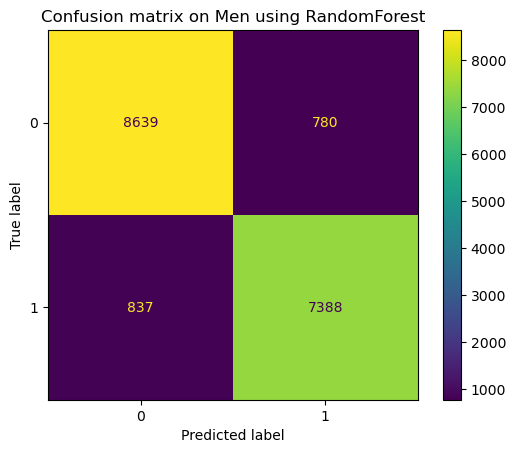

Confusion Matrix (Femme):
 [[9510  683]
 [ 608 4818]]


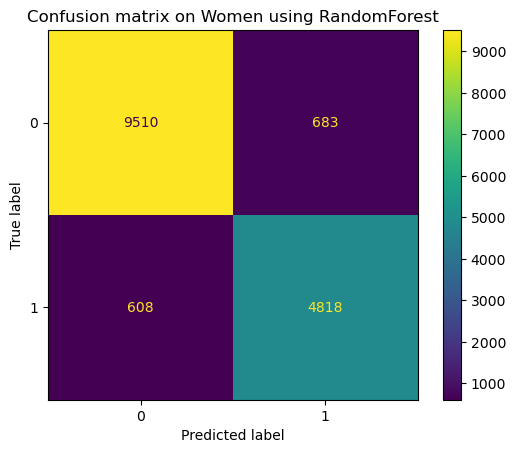

Statistical Parity Male: 46.62% 
Equal Opportunity (TPR) Male: 89.82% 
Predictive Equality (FPR)Male: 8.28% 
Statistical Parity Female:  34.74%
Equal Opportunity (TPR) Female:  88.79%
Predictive Equality (FPR) Female:  6.70%
Training AdaBoost...
Confusion Matrix (Homme):
 [[7761 1555]
 [1715 6613]]


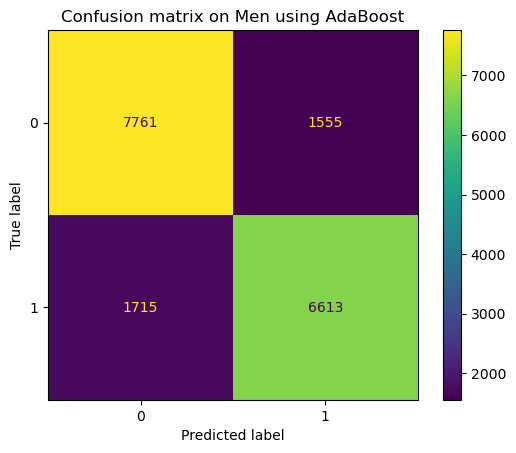

Confusion Matrix (Femme):
 [[8935 1563]
 [1183 3938]]


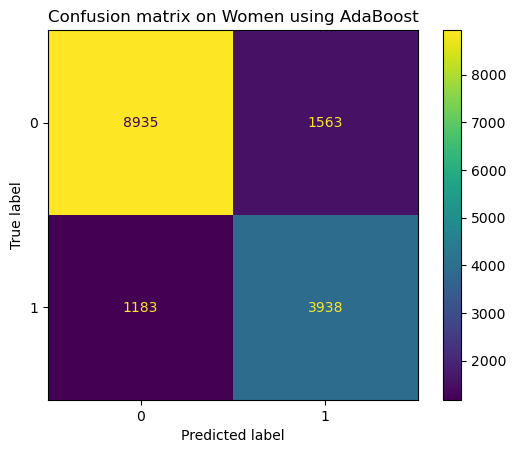

Statistical Parity Male: 47.20% 
Equal Opportunity (TPR) Male: 79.41% 
Predictive Equality (FPR)Male: 16.69% 
Statistical Parity Female:  32.79%
Equal Opportunity (TPR) Female:  76.90%
Predictive Equality (FPR) Female:  14.89%
Training GradientBoosting...
Confusion Matrix (Homme):
 [[7918 1365]
 [1558 6803]]


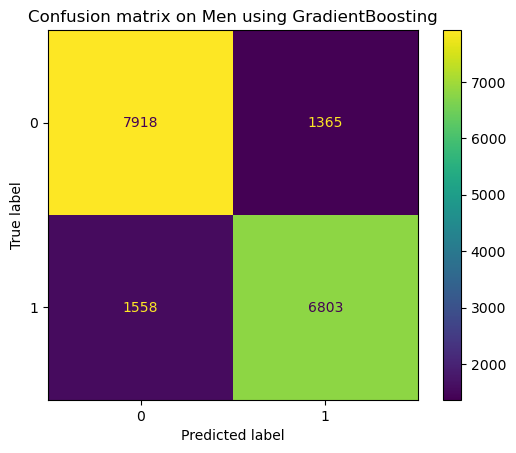

Confusion Matrix (Femme):
 [[8987 1320]
 [1131 4181]]


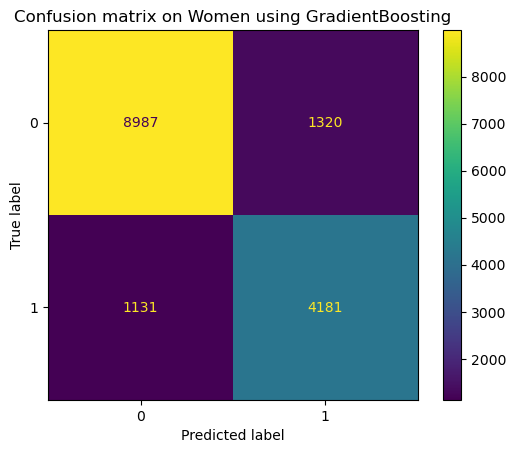

Statistical Parity Male: 47.39% 
Equal Opportunity (TPR) Male: 81.37% 
Predictive Equality (FPR)Male: 14.70% 
Statistical Parity Female:  34.01%
Equal Opportunity (TPR) Female:  78.71%
Predictive Equality (FPR) Female:  12.81%


In [24]:

#statistical_parity
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Equal Opportunity)
    FPR = FP / (FP + TN)  # False Positive Rate (Predictive Equality)
    return TPR, FPR

for name, best_model in best_models.items():
    print(f"Training {name}...")
    y_pred_homme = best_model.predict(X_test_homme)
    cm_homme = confusion_matrix(y_pred_homme, y_test_homme)
    print("Confusion Matrix (Homme):\n", cm_homme)
    cm_homme_plot=ConfusionMatrixDisplay(confusion_matrix=cm_homme)
    cm_homme_plot.plot()
    plt.title(f'Confusion matrix on Men using {name}')
    plt.show()
    
    y_pred_femme = best_model.predict(X_test_femme)
    cm_femme = confusion_matrix(y_pred_femme, y_test_femme)
    print("Confusion Matrix (Femme):\n", cm_femme)
    cm_femme_plot=ConfusionMatrixDisplay(confusion_matrix=cm_femme)
    cm_femme_plot.plot()
    plt.title(f'Confusion matrix on Women using {name}')
    plt.show()
    
    # Calculer Equal Opportunity & Predictive Equality
    tpr_homme, fpr_homme = calculate_metrics(cm_homme)
    tpr_femme, fpr_femme = calculate_metrics(cm_femme)
    
    # Calculer Statistical Parity
    sp_homme = sum(y_pred_homme) / len(y_pred_homme)
    sp_femme = sum(y_pred_femme) / len(y_pred_femme)
    
    print(f"Statistical Parity Male: {sp_homme:.2%} ")
    print(f"Equal Opportunity (TPR) Male: {tpr_homme:.2%} ")
    print(f"Predictive Equality (FPR)Male: {fpr_homme:.2%} ")
    print(f"Statistical Parity Female:  {sp_femme:.2%}")
    print(f"Equal Opportunity (TPR) Female:  {tpr_femme:.2%}")
    print(f"Predictive Equality (FPR) Female:  {fpr_femme:.2%}")




  
    

In [40]:
print(X_train.head())

   AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP
0  41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0      1
1  77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0      1
2  38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0      0
3  30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0      1
4  36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0      0


C:\Users\zhuxuxin\anaconda3\envs\new_tp_supervise\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Homme):
 [[8135 1341]
 [2303 5865]]


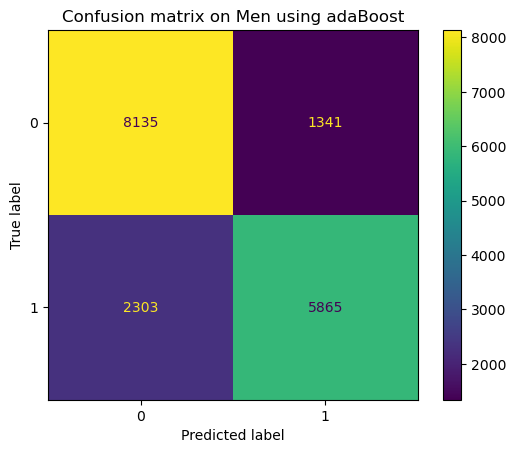

Confusion Matrix (Femme):
 [[8582 1536]
 [1420 4081]]


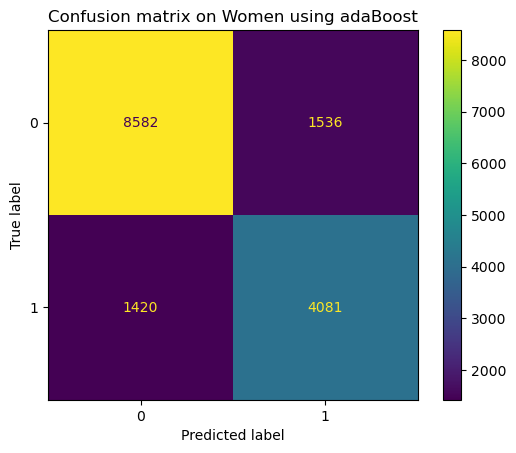

Statistical Parity Male: 40.84% 
Equal Opportunity (TPR) Male: 71.80% 
Predictive Equality (FPR)Male: 14.15% 
Statistical Parity Female:  35.96%
Equal Opportunity (TPR) Female:  74.19%
Predictive Equality (FPR) Female:  15.18%


In [23]:
## no-gender
X_train, X_test, y_train, y_test = train_test_split(
    features,           
    labels,             
    test_size=0.2,     
    random_state=42,  
)

X_test_original = X_test.copy()
X_train_no_gender = X_train.drop(columns=['SEX'])
X_test_no_gender = X_test.drop(columns=['SEX'])

####### train new model and enregistrement
model_no_gender = AdaBoostClassifier()
model_no_gender.fit(X_train_no_gender, y_train)
y_pred_no_gender = model_no_gender.predict(X_test_no_gender)
# joblib.dump(model_no_gender,'adaBoost_sans_gender.joblib')

##### load new training
#adaBoost_no_gender = joblib.load("adaBoost_sans_gender.joblib")

y_test_homme = y_test[X_test_original['SEX'] == 1]
y_test_femme = y_test[X_test_original['SEX'] == 2]

y_pred_homme_no_gender = y_pred_no_gender[X_test_original['SEX']==1]
y_pred_femme_no_gender = y_pred_no_gender[X_test_original['SEX']==2]


cm_homme_no_gender = confusion_matrix(y_test_homme, y_pred_homme_no_gender) 
cm_femme_no_gender = confusion_matrix(y_test_femme, y_pred_femme_no_gender) 


print("Confusion Matrix (Homme):\n", cm_homme_no_gender)
cm_homme_plot=ConfusionMatrixDisplay(confusion_matrix=cm_homme_no_gender)
cm_homme_plot.plot()
plt.title("Confusion matrix on Men using adaBoost")
plt.show()

print("Confusion Matrix (Femme):\n", cm_femme_no_gender)
cm_femme_plot=ConfusionMatrixDisplay(confusion_matrix=cm_femme_no_gender)
cm_femme_plot.plot()
plt.title("Confusion matrix on Women using adaBoost")
plt.show()


# Calculer Equal Opportunity & Predictive Equality
tpr_homme, fpr_homme = calculate_metrics(cm_homme_no_gender)
tpr_femme, fpr_femme = calculate_metrics(cm_femme_no_gender)

# Calculer Statistical Parity
sp_homme = sum(y_pred_homme_no_gender) / len(y_pred_homme_no_gender)
sp_femme = sum(y_pred_femme_no_gender) / len(y_pred_femme_no_gender)

print(f"Statistical Parity Male: {sp_homme:.2%} ")
print(f"Equal Opportunity (TPR) Male: {tpr_homme:.2%} ")
print(f"Predictive Equality (FPR)Male: {fpr_homme:.2%} ")
print(f"Statistical Parity Female:  {sp_femme:.2%}")
print(f"Equal Opportunity (TPR) Female:  {tpr_femme:.2%}")
print(f"Predictive Equality (FPR) Female:  {fpr_femme:.2%}")

In [5]:
best_models={
    #'RandomForest': joblib.load('RandomForest_BestModel_08246.joblib'),
    'AdaBoost':  joblib.load('AdaBoost_BestModel_08213.joblib'),
    'GradientBoosting':  joblib.load('GradientBoosting_BestModel_08295.joblib'),
    #'Stacking':  joblib.load('../Best Models/SVM_BestModel_08148.joblib')
}

KeyError: 255